# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# done
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
UNITS='metric' #can also be 'imperial'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# done
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# done
# Set the API base URL
base_url=f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={UNITS}'
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
#     if i>15:break #<-------------------------------------------------------test
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = f'{base_url}&q={city}'    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response=requests.get(city_url)
        responsej=response.json()
#         pprint(responsej)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat=responsej['coord']['lat']
        city_lng=responsej['coord']['lon']
#         print(city_lat,city_lng)
        #       
        city_max_temp=responsej['main']['temp_max']
        city_humidity=responsej['main']['humidity']
        city_clouds=responsej['clouds']['all']
        city_wind=responsej['wind']['speed']
        city_country=responsej['sys']['country']
        city_date=responsej['dt']
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#         break
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ta`u
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | iskateley
Processing Record 5 of Set 1 | hajnowka
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | maba
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | ponta delgada
Processing Record 11 of Set 1 | the pas
Processing Record 12 of Set 1 | aykhal
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | lihue
Processing Record 16 of Set 1 | mili
Processing Record 17 of Set 1 | malanje
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | kly

Processing Record 40 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 41 of Set 4 | holualoa
Processing Record 42 of Set 4 | keflavik
Processing Record 43 of Set 4 | ust-tsilma
Processing Record 44 of Set 4 | cabo san lucas
Processing Record 45 of Set 4 | vila velha
Processing Record 46 of Set 4 | mount gambier
Processing Record 47 of Set 4 | egirdir
Processing Record 48 of Set 4 | tindouf
Processing Record 49 of Set 4 | island harbour
Processing Record 0 of Set 5 | pizarro
Processing Record 1 of Set 5 | shenjiamen
Processing Record 2 of Set 5 | isla mujeres
Processing Record 3 of Set 5 | baukau
Processing Record 4 of Set 5 | tazovsky
Processing Record 5 of Set 5 | nova sintra
Processing Record 6 of Set 5 | abrud
Processing Record 7 of Set 5 | kasama
Processing Record 8 of Set 5 | salalah
Processing Record 9 of Set 5 | hamilton
Processing Record 10 of Set 5 | vilyuchinsk
Processing Record 11 of Set 5 | lisakovsk
Processing Record 12 of Set 5 | katsuura
Processing Rec

Processing Record 30 of Set 8 | orangeburg
Processing Record 31 of Set 8 | ujae
Processing Record 32 of Set 8 | preston
Processing Record 33 of Set 8 | labrador city
Processing Record 34 of Set 8 | deir ez-zor
Processing Record 35 of Set 8 | ishigaki
Processing Record 36 of Set 8 | xiaoshi
Processing Record 37 of Set 8 | amarillo
Processing Record 38 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 39 of Set 8 | shimoda
Processing Record 40 of Set 8 | ulubey
Processing Record 41 of Set 8 | chinchilla
Processing Record 42 of Set 8 | kingston
Processing Record 43 of Set 8 | enewetak
Processing Record 44 of Set 8 | nemuro
Processing Record 45 of Set 8 | tadine
Processing Record 46 of Set 8 | la ronge
Processing Record 47 of Set 8 | muisne
Processing Record 48 of Set 8 | badou
Processing Record 49 of Set 8 | bay harbor
Processing Record 0 of Set 9 | gulf shores
Processing Record 1 of Set 9 | nyurba
Processing Record 2 of Set 9 | voluntari
Processing Record 3 of Set

Processing Record 17 of Set 12 | chaiyaphum
Processing Record 18 of Set 12 | tughyl
Processing Record 19 of Set 12 | mahaddayweyne
Processing Record 20 of Set 12 | minas de marcona
Processing Record 21 of Set 12 | balabac
Processing Record 22 of Set 12 | valparaiso
Processing Record 23 of Set 12 | lospalos
Processing Record 24 of Set 12 | bikenibeu village
Processing Record 25 of Set 12 | al bayda'
Processing Record 26 of Set 12 | whistler
Processing Record 27 of Set 12 | agat village
City not found. Skipping...
Processing Record 28 of Set 12 | kone
Processing Record 29 of Set 12 | kolpashevo
Processing Record 30 of Set 12 | cadale
Processing Record 31 of Set 12 | puerto san jose
Processing Record 32 of Set 12 | fabens
Processing Record 33 of Set 12 | mbalmayo
Processing Record 34 of Set 12 | deniliquin
Processing Record 35 of Set 12 | yaren
Processing Record 36 of Set 12 | inhambane
Processing Record 37 of Set 12 | timimoun
Processing Record 38 of Set 12 | san ignacio
Processing Recor

In [4]:
# done
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame(
    city_data
)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# done
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ta`u,-14.2336,-169.5144,26.76,79,34,3.79,AS,1682276261
1,blackmans bay,-43.0167,147.3167,7.08,86,68,2.53,AU,1682276262
2,iskateley,67.6803,53.1512,-7.27,91,25,6.40,RU,1682276028
3,hajnowka,52.7433,23.5812,12.23,54,3,0.45,PL,1682276172
4,waitangi,-43.9535,-176.5597,13.23,92,100,2.24,NZ,1682276263


In [6]:
# done
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# done
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ta`u,-14.2336,-169.5144,26.76,79,34,3.79,AS,1682276261
1,blackmans bay,-43.0167,147.3167,7.08,86,68,2.53,AU,1682276262
2,iskateley,67.6803,53.1512,-7.27,91,25,6.40,RU,1682276028
3,hajnowka,52.7433,23.5812,12.23,54,3,0.45,PL,1682276172
4,waitangi,-43.9535,-176.5597,13.23,92,100,2.24,NZ,1682276263


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

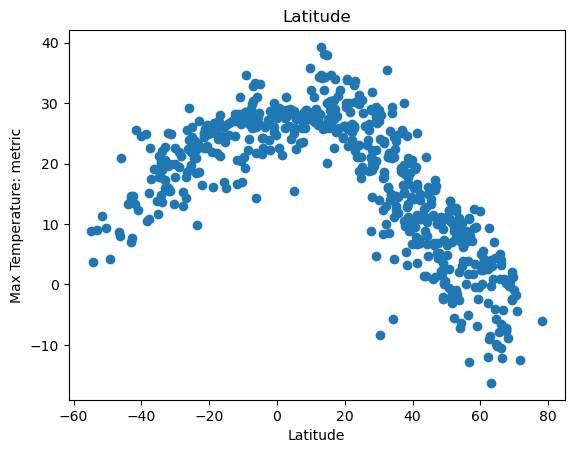

In [8]:
# done
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel(f'Max Temperature: {UNITS}')
plt.title('Latitude')
# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

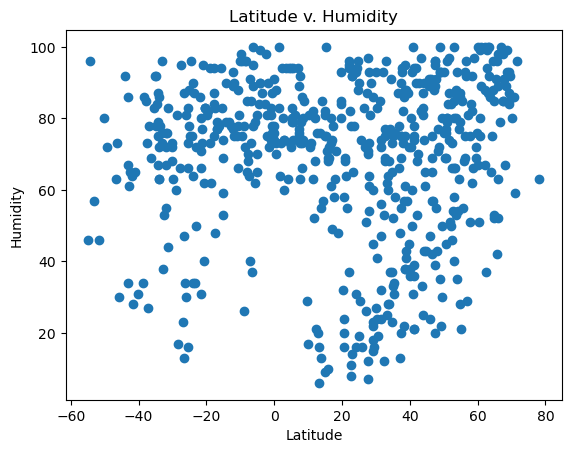

In [9]:
# done
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude v. Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

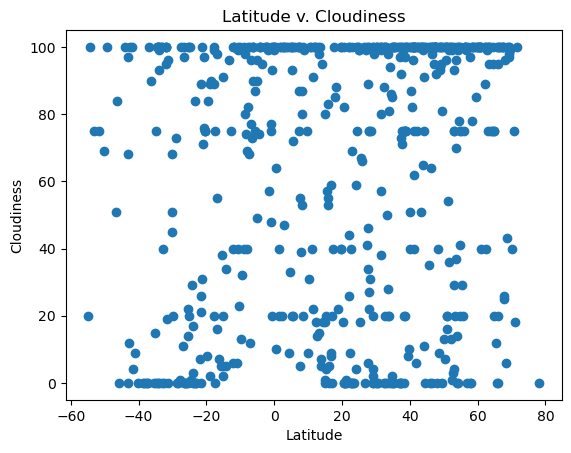

In [10]:
# done
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude v. Cloudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

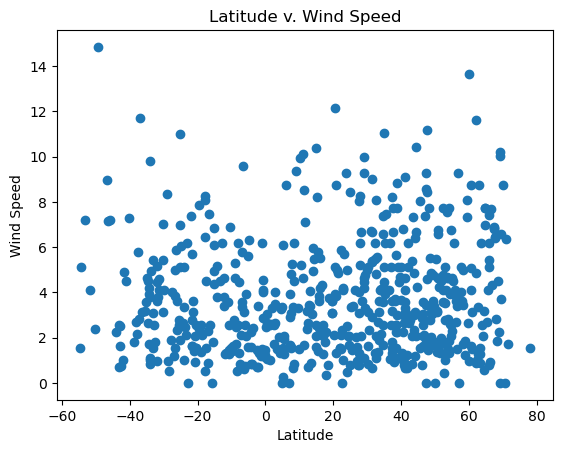

In [11]:
# done
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude v. Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# done
# Define a function to create Linear Regression plots
def lr(x,y):
    result=linregress(x,y)
    formula=None
    if result[1]>=0:
        formula='equation:\ny=%sx+%s\nwith r=%s'%(round(result[0],4),
                                                round(result[1],4),
                                                round(result[2],4))
    else:
        formula='equation:\ny=%sx%s\nwith r=%s'%(round(result[0],4),
                                                round(result[1],4),
                                                round(result[2],4))
    return result[0],result[1],formula #slope, intercept, formula

In [13]:
# done
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ta`u,-14.2336,-169.5144,26.76,79,34,3.79,AS,1682276261
1,blackmans bay,-43.0167,147.3167,7.08,86,68,2.53,AU,1682276262
2,iskateley,67.6803,53.1512,-7.27,91,25,6.40,RU,1682276028
3,hajnowka,52.7433,23.5812,12.23,54,3,0.45,PL,1682276172
4,waitangi,-43.9535,-176.5597,13.23,92,100,2.24,NZ,1682276263


In [14]:
# done
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,iskateley,67.6803,53.1512,-7.27,91,25,6.40,RU,1682276028
3,hajnowka,52.7433,23.5812,12.23,54,3,0.45,PL,1682276172
5,maba,24.6841,113.5984,17.61,96,100,1.66,CN,1682276264
7,georgetown,5.4112,100.3354,25.96,94,20,2.06,MY,1682275931
8,ponta delgada,37.7333,-25.6667,18.40,94,75,7.72,PT,1682276011


In [15]:
# done
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ta`u,-14.2336,-169.5144,26.76,79,34,3.79,AS,1682276261
1,blackmans bay,-43.0167,147.3167,7.08,86,68,2.53,AU,1682276262
4,waitangi,-43.9535,-176.5597,13.23,92,100,2.24,NZ,1682276263
6,punta arenas,-53.1500,-70.9167,9.06,57,75,7.20,CL,1682275845
11,adamstown,-25.0660,-130.1015,24.45,88,100,6.99,PN,1682276267


###  Temperature vs. Latitude Linear Regression Plot

C:\Users\rober\AppData\Local\Temp\ipykernel_24824\3397286496.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern_hemi_df['predict temp given lat']=lrnh_tvl[1]+northern_hemi_df.loc[:,'Lat']*lrnh_tvl[0]


Text(0.5, 1.0, 'Temperature v. Latitude')

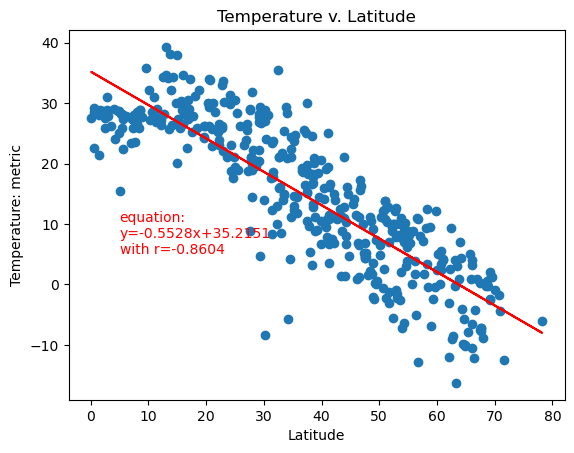

In [16]:
# Linear regression on Northern Hemisphere
lrnh_tvl=lr(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
# print(lrnh_tvl)
northern_hemi_df['predict temp given lat']=lrnh_tvl[1]+northern_hemi_df.loc[:,'Lat']*lrnh_tvl[0]
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'],northern_hemi_df['predict temp given lat'],color='red')
plt.xlabel('Latitude')
plt.ylabel(f'Temperature: {UNITS}')
plt.text(5,5,lrnh_tvl[2],color='red')
plt.title("Temperature v. Latitude")

C:\Users\rober\AppData\Local\Temp\ipykernel_24824\3429513699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern_hemi_df['predict temp given lat']=lrsh_tvl[1]+southern_hemi_df.loc[:,'Lat']*lrsh_tvl[0]


Text(0.5, 1.0, 'Temperature v. Latitude')

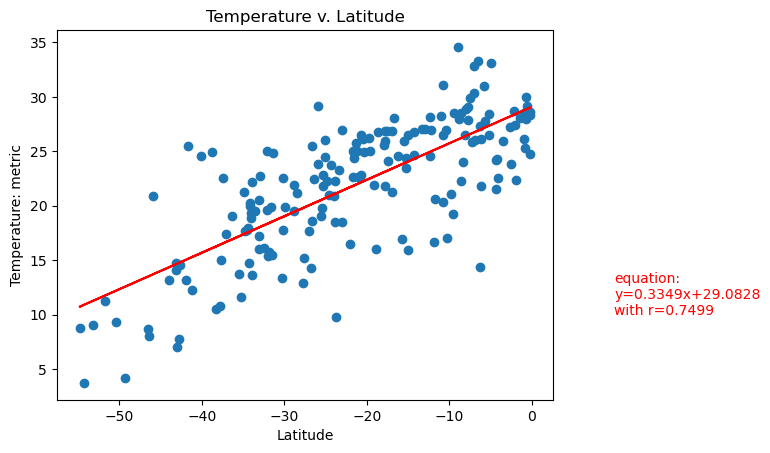

In [17]:
# Linear regression on Southern Hemisphere
lrsh_tvl=lr(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
# print(lrsh_tvl)
southern_hemi_df['predict temp given lat']=lrsh_tvl[1]+southern_hemi_df.loc[:,'Lat']*lrsh_tvl[0]
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'],southern_hemi_df['predict temp given lat'],color='red')
plt.xlabel('Latitude')
plt.ylabel(f'Temperature: {UNITS}')
plt.text(10,10,lrsh_tvl[2],color='red')
plt.title("Temperature v. Latitude")

**Discussion about the linear relationship:** The relationship to be analyzed is temperature v latitude.  Linear regression in the northern hemisphere has a negative slope of -0.56, while the slope of the southern hemisphere is 0.33, a positive slope.  This seems to be expected because the hemispheres mirror each other.  The r values are pretty good, -0.86 and 0.75 respectively, so the linear regression indicates the variables are highly coordinated. The pvalues are both very small:  this indicates that the relationship is highly significant. 

### Humidity vs. Latitude Linear Regression Plot

C:\Users\rober\AppData\Local\Temp\ipykernel_24824\4239054608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern_hemi_df['predict hum given lat']=lrnh_hvl[1]+northern_hemi_df.loc[:,'Lat']*lrnh_hvl[0]


Text(0.5, 1.0, 'Humidity v. Latitude')

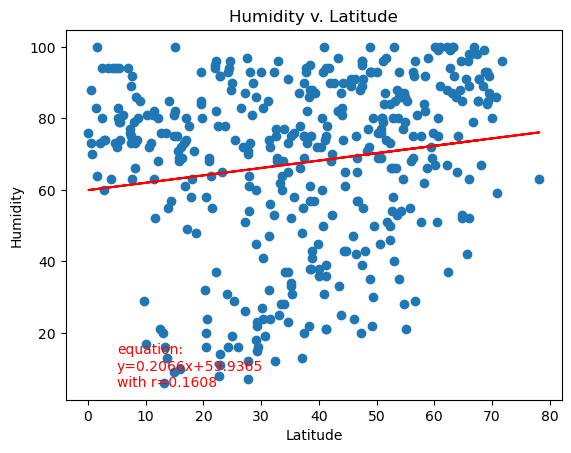

In [18]:
# Northern Hemisphere
lrnh_hvl=lr(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
# print(lrnh_hvl)
northern_hemi_df['predict hum given lat']=lrnh_hvl[1]+northern_hemi_df.loc[:,'Lat']*lrnh_hvl[0]
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'],northern_hemi_df['predict hum given lat'],color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.text(5,5,lrnh_hvl[2],color='red')
plt.title("Humidity v. Latitude")

C:\Users\rober\AppData\Local\Temp\ipykernel_24824\913151613.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern_hemi_df['predict hum given lat']=lrsh_hvl[1]+southern_hemi_df.loc[:,'Lat']*lrsh_hvl[0]


Text(0.5, 1.0, 'Humidity v. Latitude')

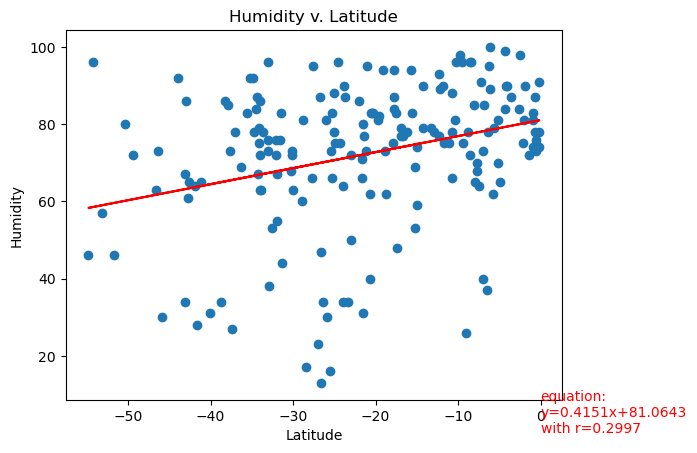

In [19]:
# Southern Hemisphere
lrsh_hvl=lr(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
# print(lrsh_hvl)
southern_hemi_df['predict hum given lat']=lrsh_hvl[1]+southern_hemi_df.loc[:,'Lat']*lrsh_hvl[0]
# northern_hemi_df.head()
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'],southern_hemi_df['predict hum given lat'],color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.text(0,0,lrsh_hvl[2],color='red')
plt.title("Humidity v. Latitude")

**Discussion about the linear relationship:** The humidity v latitude relationshp for northern and southern hemispheres both have very low r-values:  0.16 and 0.30 respectively.  This is horrible.  That indicates that these relationships are not highly coordinated and the linear regression explains very little.

### Cloudiness vs. Latitude Linear Regression Plot

C:\Users\rober\AppData\Local\Temp\ipykernel_24824\2547022786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern_hemi_df['predict cloudiness given lat']=lrnh_cvl[1]+northern_hemi_df.loc[:,'Lat']*lrnh_cvl[0]


Text(0.5, 1.0, 'Cloudiness v. Latitude')

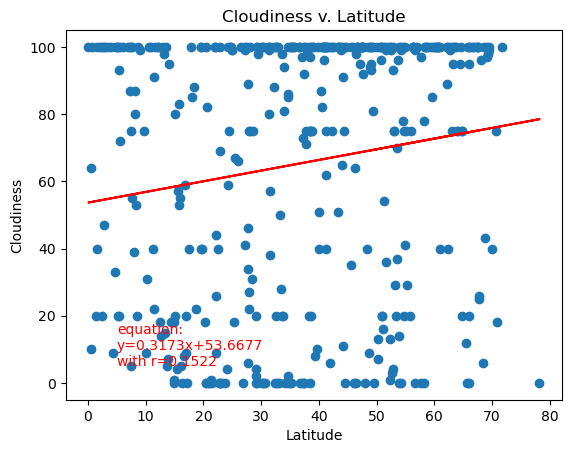

In [20]:
# Northern Hemisphere
lrnh_cvl=lr(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
# print(lrnh_cvl)
northern_hemi_df['predict cloudiness given lat']=lrnh_cvl[1]+northern_hemi_df.loc[:,'Lat']*lrnh_cvl[0]
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'],northern_hemi_df['predict cloudiness given lat'],color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.text(5,5,lrnh_cvl[2],color='red')
plt.title("Cloudiness v. Latitude")

C:\Users\rober\AppData\Local\Temp\ipykernel_24824\2850335420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern_hemi_df['predict cloudiness given lat']=lrsh_cvl[1]+southern_hemi_df.loc[:,'Lat']*lrsh_cvl[0]


Text(0.5, 1.0, 'Cloudiness v. Latitude')

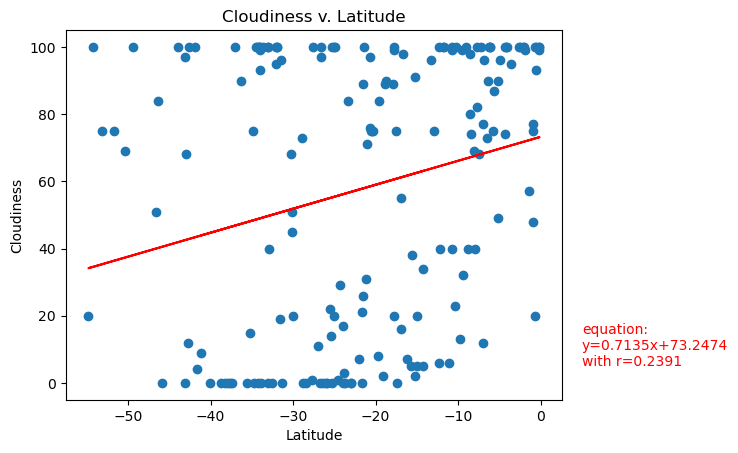

In [21]:
# Southern Hemisphere
lrsh_cvl=lr(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
# print(lrsh_cvl)
southern_hemi_df['predict cloudiness given lat']=lrsh_cvl[1]+southern_hemi_df.loc[:,'Lat']*lrsh_cvl[0]
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'],southern_hemi_df['predict cloudiness given lat'],color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.text(5,5,lrsh_cvl[2],color='red')
plt.title("Cloudiness v. Latitude")

**Discussion about the linear relationship:** The linear regression of the relationship between cloudiness and latitude, by hemisphere, shows a very poor coorelation:  0.15 northern and 0.24 southern.  This is horrible.  There is so much variation unexplained by the linear regression that it is not useful.

### Wind Speed vs. Latitude Linear Regression Plot

C:\Users\rober\AppData\Local\Temp\ipykernel_24824\1969133657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern_hemi_df['predict wind speed given lat']=lrnh_wvl[1]+northern_hemi_df.loc[:,'Lat']*lrnh_wvl[0]


Text(0.5, 1.0, 'Wind Speed v. Latitude')

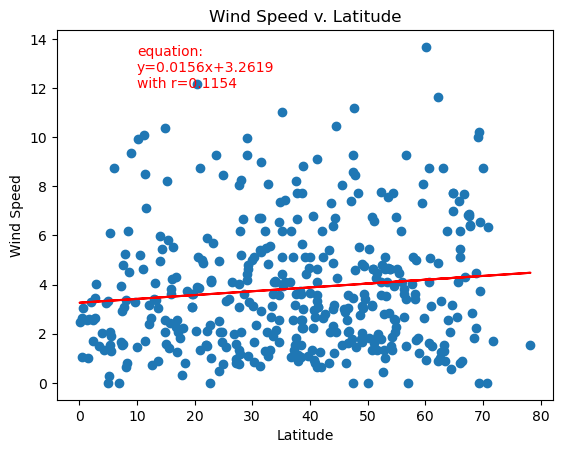

In [32]:
# Northern Hemisphere
lrnh_wvl=lr(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
# print(lrnh_wvl)
northern_hemi_df['predict wind speed given lat']=lrnh_wvl[1]+northern_hemi_df.loc[:,'Lat']*lrnh_wvl[0]
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'],northern_hemi_df['predict wind speed given lat'],color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.text(10,12,lrnh_wvl[2],color='red')
plt.title("Wind Speed v. Latitude")

C:\Users\rober\AppData\Local\Temp\ipykernel_24824\2843662416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern_hemi_df['predict wind speed given lat']=lrsh_wvl[1]+southern_hemi_df.loc[:,'Lat']*lrsh_wvl[0]


Text(0.5, 1.0, 'Wind Speed v. Latitude')

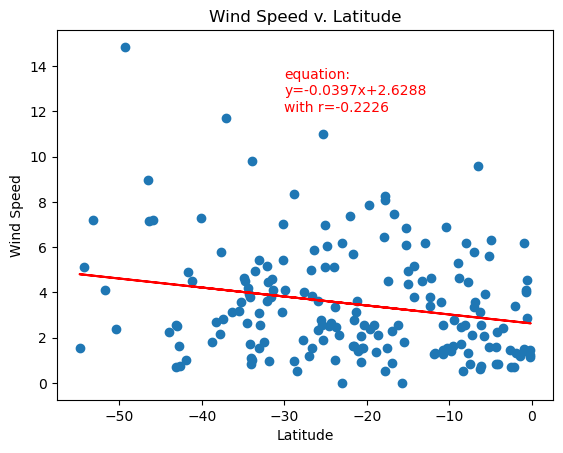

In [38]:
# Southern Hemisphere
lrsh_wvl=lr(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
# print(lrsh_wvl)
southern_hemi_df['predict wind speed given lat']=lrsh_wvl[1]+southern_hemi_df.loc[:,'Lat']*lrsh_wvl[0]
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'],southern_hemi_df['predict wind speed given lat'],color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.text(-30,12,lrsh_wvl[2],color='red')
plt.title("Wind Speed v. Latitude")

**Discussion about the linear relationship:** Wind speed is poorly coorelated with latitude.  The northern hemisphere has, for the relationship, an r value of 0.12 and the southern hemisphere an r-value of 0.22. This means that the relationship is pretty horrible and doesn't explain much.  However, it is rather odd that the r-values between the northern and southern hemisphere vary greatly.  I don't know what could create that difference.